In [92]:
import os
import sys
import xml.etree.ElementTree as ET
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier
from PIL import Image
import glob
import pandas as pd
import tqdm
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

In [93]:
raster_signs = {'BlackCount' : None,
        'WhiteHolesCount' : None,
        'HorzStrokesCount' : None,
        'VertStrokesCount' : None,
        'MaxHorzStrokeLength' : None,
        'Left' : None,
        'Top' : None,
        'Right' : None,
        'Bottom' : None}

In [94]:
def parse_directoty(directoty):
    x = []
    for filename in os.listdir(directoty):
        if filename[-3:].lower() != 'xml':
            continue
        tree = ET.parse(directoty + '/' + filename)
        root = tree.getroot()
        image = list(root)[-1]
        for word_fragment in image:
            image_info = raster_signs
            for attr_key in word_fragment.attrib:
                if attr_key not in image_info:
                    continue
                image_info[attr_key] = int(word_fragment.attrib[attr_key])
            rect = list(word_fragment)[0].attrib
            for attr_key in rect:
                image_info[attr_key] = int(rect[attr_key])
            info = []
            for key in image_info:
                info.append(image_info[key])
            x.append(info)
    
    return np.array(x)

In [95]:
def parse_img(path):
    x = []
    tree = ET.parse(path)
    root = tree.getroot()
    image = list(root)[-1]
    for word_fragment in image:
        image_info = raster_signs
        for attr_key in word_fragment.attrib:
            if attr_key not in image_info:
                continue
            image_info[attr_key] = int(word_fragment.attrib[attr_key])
        rect = list(word_fragment)[0].attrib
        for attr_key in rect:
            image_info[attr_key] = int(rect[attr_key])
        info = []
        for key in image_info:
            info.append(image_info[key])
        x.append(info)

    return np.array(x)

In [96]:
def draw_roc_curve(y_true, y_pred, title, show_auc=True, figsize=(18,9)):
    plt.figure(figsize=figsize)
    plt.grid()
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    if show_auc:
        plt.plot(fpr, tpr, linewidth=3., label="roc-auc score: {:0.5f}".format(roc_auc_score(y_true, y_pred)))
        plt.legend(fontsize=24)
    else:
        plt.plot(fpr, tpr, linewidth=3.)
    plt.plot([0, 1], [0, 1], 'ko--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(title)
    plt.show()

In [97]:
def draw_pr_curve(y_true, y_pred, title, show_auc=True, figsize=(18,9)):
    plt.figure(figsize=figsize)
    plt.grid()
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    if show_auc:
        plt.plot(precision, recall,
                 linewidth=3., 
                 label="pr-auc score: {:0.5f}".format(
                     average_precision_score(y_test, y_pred)))
        plt.legend(fontsize=24)
    else:
        plt.plot(precision, recall,
                 linewidth=3.)
    plt.xlabel('precision')
    plt.ylabel('recall')
    plt.title(title)
    plt.show()

In [98]:
text_dir = './Text'
nontext_dir = './Nontext'

In [99]:
x_text = parse_directoty(text_dir)
x_nontext = parse_directoty(nontext_dir)

In [100]:
x = np.array([*x_text] + [*x_nontext], np.float)
y = np.array([1]*x_text.shape[0] + [0]*x_nontext.shape[0])

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17, stratify=y)

In [105]:
CatBoost_clf = CatBoostClassifier(iterations=1000,
                            depth=8,
                            l2_leaf_reg = 0.1,
                            eval_metric = 'Accuracy',
                            leaf_estimation_iterations = 10
    )

parameters = {'depth'         : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
             }
CatBoost_clf.fit(x_train, y_train)

0:	learn: 0.8632546	total: 174ms	remaining: 2m 53s
1:	learn: 0.8663644	total: 349ms	remaining: 2m 54s
2:	learn: 0.8673816	total: 527ms	remaining: 2m 55s
3:	learn: 0.8711018	total: 724ms	remaining: 3m
4:	learn: 0.8714215	total: 894ms	remaining: 2m 57s
5:	learn: 0.8725550	total: 1.07s	remaining: 2m 56s
6:	learn: 0.8747929	total: 1.24s	remaining: 2m 56s
7:	learn: 0.8776702	total: 1.42s	remaining: 2m 55s
8:	learn: 0.8794431	total: 1.59s	remaining: 2m 54s
9:	learn: 0.8796756	total: 1.77s	remaining: 2m 55s
10:	learn: 0.8816229	total: 1.94s	remaining: 2m 54s
11:	learn: 0.8826111	total: 2.11s	remaining: 2m 53s
12:	learn: 0.8827855	total: 2.28s	remaining: 2m 53s
13:	learn: 0.8828436	total: 2.45s	remaining: 2m 52s
14:	learn: 0.8835411	total: 2.63s	remaining: 2m 52s
15:	learn: 0.8838608	total: 2.8s	remaining: 2m 52s
16:	learn: 0.8849362	total: 2.98s	remaining: 2m 52s
17:	learn: 0.8850815	total: 3.15s	remaining: 2m 52s
18:	learn: 0.8855756	total: 3.33s	remaining: 2m 51s
19:	learn: 0.8863022	total:

158:	learn: 0.9190572	total: 27.8s	remaining: 2m 26s
159:	learn: 0.9192316	total: 27.9s	remaining: 2m 26s
160:	learn: 0.9193478	total: 28.1s	remaining: 2m 26s
161:	learn: 0.9195513	total: 28.3s	remaining: 2m 26s
162:	learn: 0.9194931	total: 28.4s	remaining: 2m 26s
163:	learn: 0.9197838	total: 28.6s	remaining: 2m 25s
164:	learn: 0.9197256	total: 28.8s	remaining: 2m 25s
165:	learn: 0.9200163	total: 28.9s	remaining: 2m 25s
166:	learn: 0.9202779	total: 29.1s	remaining: 2m 25s
167:	learn: 0.9203360	total: 29.3s	remaining: 2m 25s
168:	learn: 0.9204232	total: 29.5s	remaining: 2m 24s
169:	learn: 0.9207138	total: 29.6s	remaining: 2m 24s
170:	learn: 0.9208301	total: 29.8s	remaining: 2m 24s
171:	learn: 0.9207719	total: 30s	remaining: 2m 24s
172:	learn: 0.9207429	total: 30.1s	remaining: 2m 24s
173:	learn: 0.9208591	total: 30.3s	remaining: 2m 23s
174:	learn: 0.9209463	total: 30.5s	remaining: 2m 23s
175:	learn: 0.9211788	total: 30.6s	remaining: 2m 23s
176:	learn: 0.9212660	total: 30.8s	remaining: 2m

315:	learn: 0.9326591	total: 54.3s	remaining: 1m 57s
316:	learn: 0.9326881	total: 54.5s	remaining: 1m 57s
317:	learn: 0.9326881	total: 54.6s	remaining: 1m 57s
318:	learn: 0.9328625	total: 54.8s	remaining: 1m 56s
319:	learn: 0.9329497	total: 55s	remaining: 1m 56s
320:	learn: 0.9330659	total: 55.1s	remaining: 1m 56s
321:	learn: 0.9330659	total: 55.3s	remaining: 1m 56s
322:	learn: 0.9332694	total: 55.5s	remaining: 1m 56s
323:	learn: 0.9332403	total: 55.7s	remaining: 1m 56s
324:	learn: 0.9331822	total: 55.8s	remaining: 1m 55s
325:	learn: 0.9332985	total: 56s	remaining: 1m 55s
326:	learn: 0.9332403	total: 56.2s	remaining: 1m 55s
327:	learn: 0.9332403	total: 56.4s	remaining: 1m 55s
328:	learn: 0.9333566	total: 56.6s	remaining: 1m 55s
329:	learn: 0.9334438	total: 56.7s	remaining: 1m 55s
330:	learn: 0.9334147	total: 56.9s	remaining: 1m 55s
331:	learn: 0.9334147	total: 57.1s	remaining: 1m 54s
332:	learn: 0.9334438	total: 57.3s	remaining: 1m 54s
333:	learn: 0.9334438	total: 57.5s	remaining: 1m 5

469:	learn: 0.9414363	total: 1m 19s	remaining: 1m 29s
470:	learn: 0.9414363	total: 1m 19s	remaining: 1m 29s
471:	learn: 0.9414945	total: 1m 19s	remaining: 1m 29s
472:	learn: 0.9415526	total: 1m 19s	remaining: 1m 29s
473:	learn: 0.9417851	total: 1m 20s	remaining: 1m 28s
474:	learn: 0.9417851	total: 1m 20s	remaining: 1m 28s
475:	learn: 0.9417851	total: 1m 20s	remaining: 1m 28s
476:	learn: 0.9418723	total: 1m 20s	remaining: 1m 28s
477:	learn: 0.9419014	total: 1m 20s	remaining: 1m 28s
478:	learn: 0.9419885	total: 1m 20s	remaining: 1m 27s
479:	learn: 0.9419595	total: 1m 21s	remaining: 1m 27s
480:	learn: 0.9420467	total: 1m 21s	remaining: 1m 27s
481:	learn: 0.9422211	total: 1m 21s	remaining: 1m 27s
482:	learn: 0.9421629	total: 1m 21s	remaining: 1m 27s
483:	learn: 0.9422501	total: 1m 21s	remaining: 1m 27s
484:	learn: 0.9422501	total: 1m 21s	remaining: 1m 26s
485:	learn: 0.9421920	total: 1m 22s	remaining: 1m 26s
486:	learn: 0.9422211	total: 1m 22s	remaining: 1m 26s
487:	learn: 0.9422792	total:

622:	learn: 0.9466388	total: 1m 44s	remaining: 1m 2s
623:	learn: 0.9466388	total: 1m 44s	remaining: 1m 2s
624:	learn: 0.9466678	total: 1m 44s	remaining: 1m 2s
625:	learn: 0.9466678	total: 1m 44s	remaining: 1m 2s
626:	learn: 0.9466678	total: 1m 44s	remaining: 1m 2s
627:	learn: 0.9466969	total: 1m 44s	remaining: 1m 2s
628:	learn: 0.9467550	total: 1m 45s	remaining: 1m 1s
629:	learn: 0.9467550	total: 1m 45s	remaining: 1m 1s
630:	learn: 0.9467550	total: 1m 45s	remaining: 1m 1s
631:	learn: 0.9467550	total: 1m 45s	remaining: 1m 1s
632:	learn: 0.9467260	total: 1m 45s	remaining: 1m 1s
633:	learn: 0.9467260	total: 1m 45s	remaining: 1m 1s
634:	learn: 0.9467260	total: 1m 46s	remaining: 1m
635:	learn: 0.9467260	total: 1m 46s	remaining: 1m
636:	learn: 0.9466969	total: 1m 46s	remaining: 1m
637:	learn: 0.9466969	total: 1m 46s	remaining: 1m
638:	learn: 0.9466969	total: 1m 46s	remaining: 1m
639:	learn: 0.9466969	total: 1m 46s	remaining: 1m
640:	learn: 0.9466969	total: 1m 46s	remaining: 59.9s
641:	learn:

779:	learn: 0.9489057	total: 2m 10s	remaining: 36.7s
780:	learn: 0.9489639	total: 2m 10s	remaining: 36.5s
781:	learn: 0.9489639	total: 2m 10s	remaining: 36.3s
782:	learn: 0.9489639	total: 2m 10s	remaining: 36.2s
783:	learn: 0.9491383	total: 2m 10s	remaining: 36s
784:	learn: 0.9491673	total: 2m 10s	remaining: 35.8s
785:	learn: 0.9491964	total: 2m 10s	remaining: 35.7s
786:	learn: 0.9491673	total: 2m 11s	remaining: 35.5s
787:	learn: 0.9491964	total: 2m 11s	remaining: 35.3s
788:	learn: 0.9491673	total: 2m 11s	remaining: 35.2s
789:	learn: 0.9492254	total: 2m 11s	remaining: 35s
790:	learn: 0.9492254	total: 2m 11s	remaining: 34.8s
791:	learn: 0.9491964	total: 2m 11s	remaining: 34.7s
792:	learn: 0.9491964	total: 2m 12s	remaining: 34.5s
793:	learn: 0.9491673	total: 2m 12s	remaining: 34.3s
794:	learn: 0.9491673	total: 2m 12s	remaining: 34.2s
795:	learn: 0.9491673	total: 2m 12s	remaining: 34s
796:	learn: 0.9491673	total: 2m 12s	remaining: 33.8s
797:	learn: 0.9492254	total: 2m 12s	remaining: 33.6s

935:	learn: 0.9505914	total: 2m 33s	remaining: 10.5s
936:	learn: 0.9505914	total: 2m 33s	remaining: 10.3s
937:	learn: 0.9505914	total: 2m 34s	remaining: 10.2s
938:	learn: 0.9505914	total: 2m 34s	remaining: 10s
939:	learn: 0.9505914	total: 2m 34s	remaining: 9.85s
940:	learn: 0.9505914	total: 2m 34s	remaining: 9.68s
941:	learn: 0.9505333	total: 2m 34s	remaining: 9.52s
942:	learn: 0.9505333	total: 2m 34s	remaining: 9.36s
943:	learn: 0.9505333	total: 2m 34s	remaining: 9.19s
944:	learn: 0.9505333	total: 2m 35s	remaining: 9.03s
945:	learn: 0.9505333	total: 2m 35s	remaining: 8.86s
946:	learn: 0.9505333	total: 2m 35s	remaining: 8.7s
947:	learn: 0.9505333	total: 2m 35s	remaining: 8.53s
948:	learn: 0.9505333	total: 2m 35s	remaining: 8.37s
949:	learn: 0.9505333	total: 2m 35s	remaining: 8.2s
950:	learn: 0.9505333	total: 2m 36s	remaining: 8.04s
951:	learn: 0.9505333	total: 2m 36s	remaining: 7.87s
952:	learn: 0.9505624	total: 2m 36s	remaining: 7.71s
953:	learn: 0.9505624	total: 2m 36s	remaining: 7.5

Accuracy: 0.9552429667519181


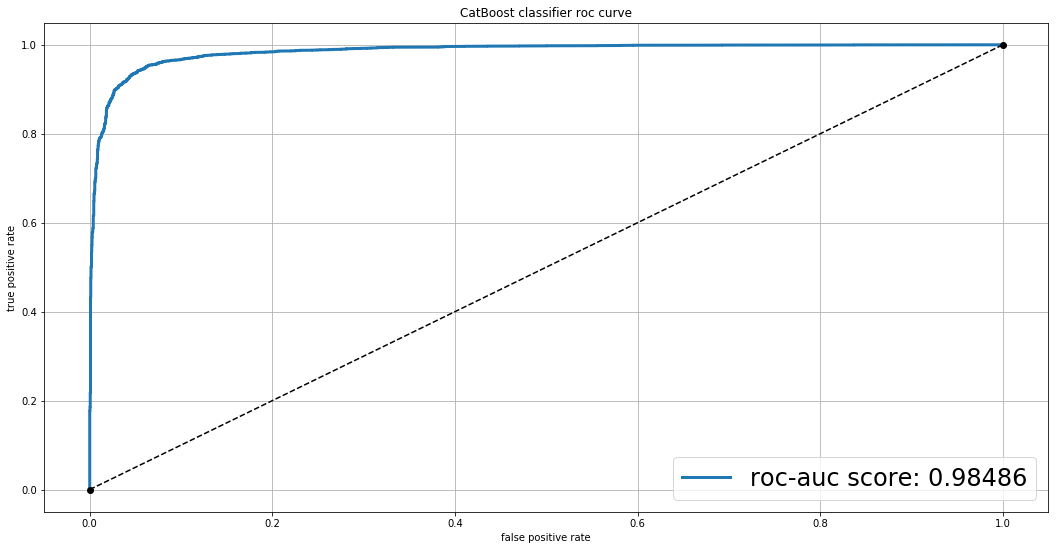

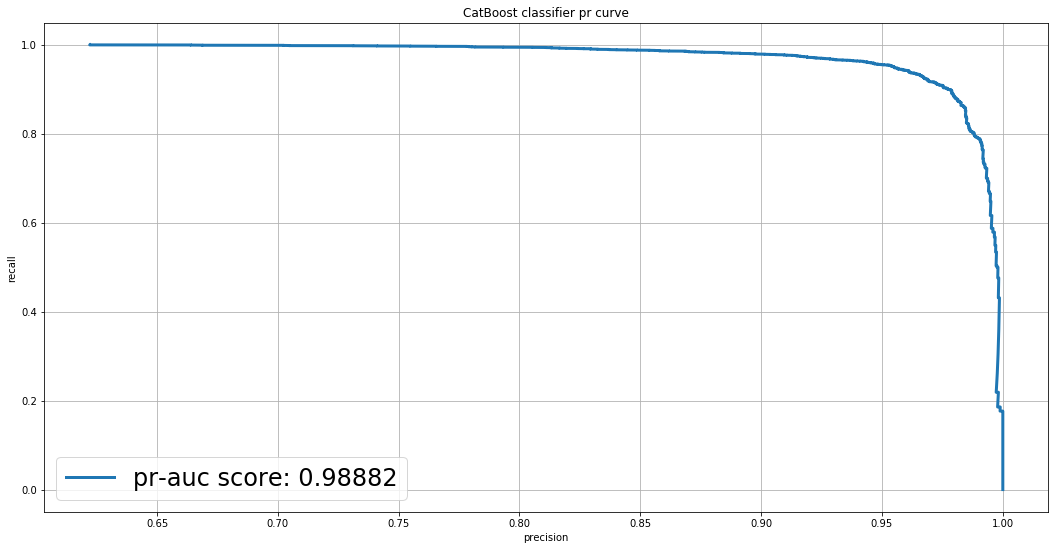

In [106]:
print("Accuracy: {}".format(accuracy_score(y_test, best_clf.predict(x_test))))
draw_roc_curve(y_test, CatBoost_clf.predict_proba(x_test)[:, 1], "CatBoost classifier roc curve")
draw_pr_curve(y_test, CatBoost_clf.predict_proba(x_test)[:, 1], "CatBoost classifier pr curve")

1.jpg 20 111 0.15267175572519084
10.jpg 173 3486 0.04728067778081443
11.jpg 10 62 0.1388888888888889
12.jpg 5 104 0.045871559633027525
13.jpg 10 90 0.1
14.jpg 53 136 0.2804232804232804
15.jpg 8 189 0.04060913705583756
16.jpg 2 35 0.05405405405405406
17.jpg 147 3897 0.03635014836795252
2.jpg 13 475 0.02663934426229508
3.jpg 70 1418 0.04704301075268817
4.jpg 11 974 0.01116751269035533
5.jpg 13 84 0.13402061855670103
6.jpg 35 954 0.03538928210313448
7.jpg 23 191 0.10747663551401869
8.jpg 39 2469 0.01555023923444976
9.jpg 31 824 0.03625730994152047
938.jpg 157 354 0.30724070450097846
fig10.gif 0 18 0.0
harvest.gif 95 367 0.20562770562770563
Ogre.jpg 130 791 0.14115092290988057


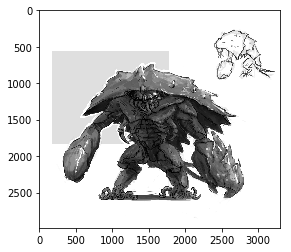

In [107]:
for filename in os.listdir(nontext_dir):
    if filename[-3:].lower() == 'xml':
        continue
    choosen_xml = nontext_dir + '/' + filename[:-3] + 'xml'
    choosen_img = nontext_dir + '/' + filename
    #print(choosen_xml, choosen_img)
    x = parse_img(choosen_xml)
    imshow(Image.open(choosen_img))
    predictions = best_clf.predict(x)
    ones = (predictions == 1).sum()
    zeroes = (predictions == 0).sum()
    print(filename, ones, zeroes,ones/(ones+zeroes))

In [108]:
# Посмотрим где он больше всего ошибся у не текста
choosen_xml = './Nontext/938.xml'
choosen_img = './Nontext/938.jpg'

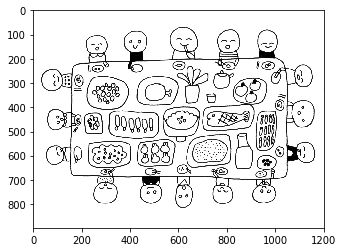

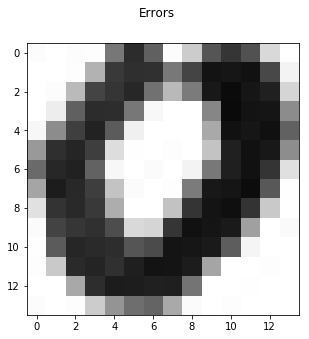

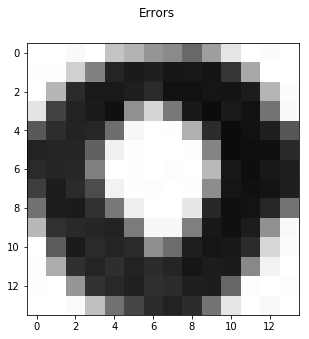

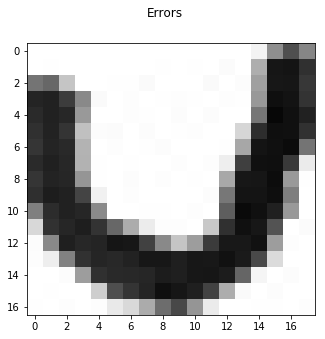

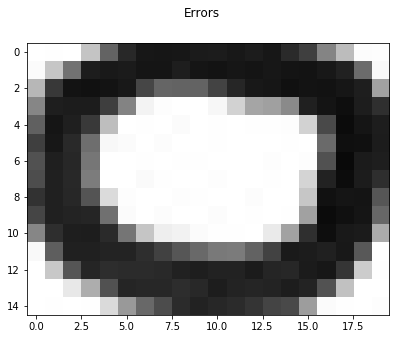

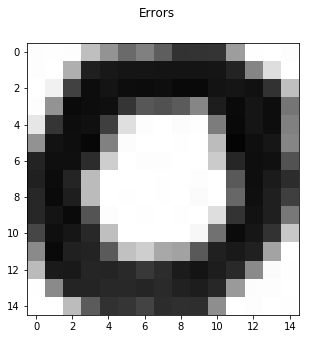

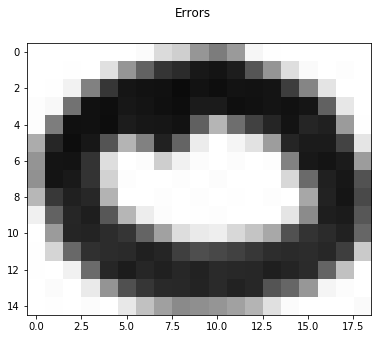

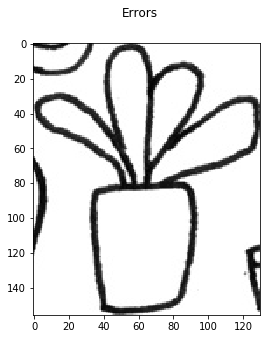

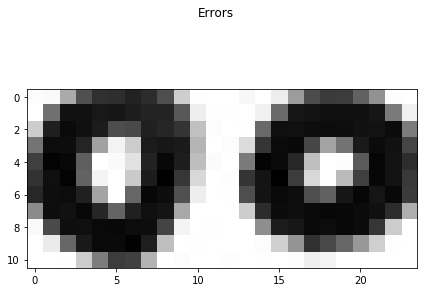

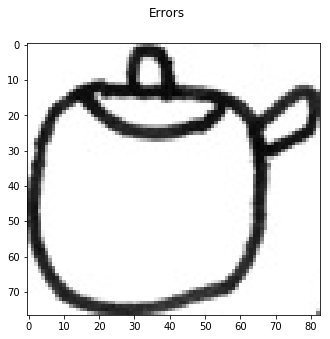

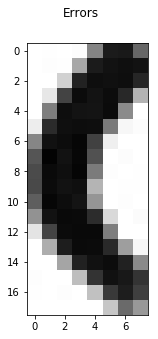

In [109]:
x = parse_img(choosen_xml)
imshow(Image.open(choosen_img))
predictions = best_clf.predict(x)
ones = (predictions == 1).sum()
zeroes = (predictions == 0).sum()

false_predicted = [i for i in range(len(predictions)) if predictions[i] == 1]
cropped_ims = []
im = Image.open(choosen_img)

for index in false_predicted:
    crop_rectangle = tuple(x[index][-4:])
    cropped_ims.append(im.crop(crop_rectangle))

for cropped_im in tqdm.tqdm_notebook(cropped_ims[:10]):
    plt.figure(figsize=(7, 5))
    plt.imshow(cropped_im)
    plt.suptitle("Errors")
    plt.show()

0001.tif 1198 14 0.01155115511551155
0003.tif 3213 33 0.010166358595194085
0005.tif 1489 28 0.01845748187211602
0007.tif 4086 86 0.020613614573346116
0009.tif 1921 37 0.018896833503575076
0024.tif 2419 81 0.0324
0031.tif 1441 87 0.05693717277486911
004.TIF 1197 14 0.011560693641618497
ENG001.TIF 536 74 0.12131147540983607
FAX001.TIF 600 38 0.05956112852664577
GAZ009P.TIF 1136 197 0.14778694673668416
MAG005.TIF 359 6 0.01643835616438356
scan300dpi.tif 4297 348 0.07491926803013993


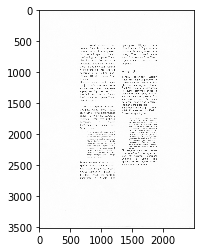

In [110]:
for filename in os.listdir(text_dir):
    if filename[-3:].lower() == 'xml':
        continue
    choosen_xml = text_dir + '/' + filename[:-3] + 'xml'
    choosen_img = text_dir + '/' + filename
    #print(choosen_xml, choosen_img)
    x = parse_img(choosen_xml)
    imshow(Image.open(choosen_img))
    predictions = best_clf.predict(x)
    ones = (predictions == 1).sum()
    zeroes = (predictions == 0).sum()
    print(filename, ones, zeroes, zeroes/(ones+zeroes))

In [113]:
# Посмотрим где он больше всего ошибся у текста
choosen_xml = './Text/scan300dpi.xml'
choosen_img = './Text/scan300dpi.tif'

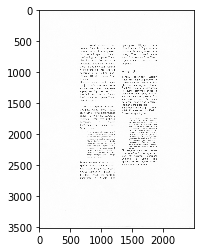

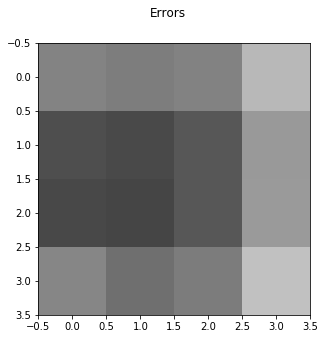

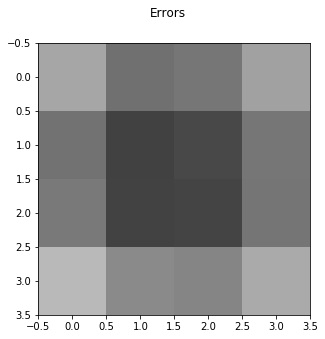

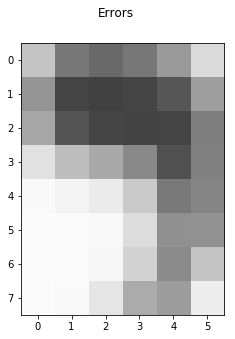

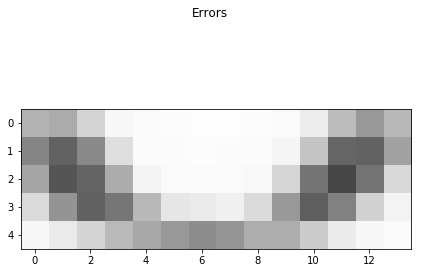

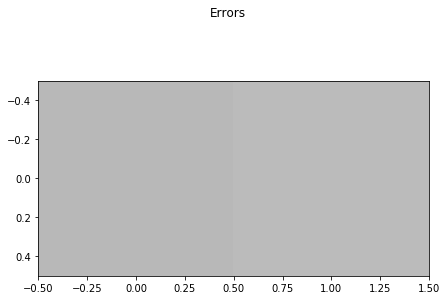

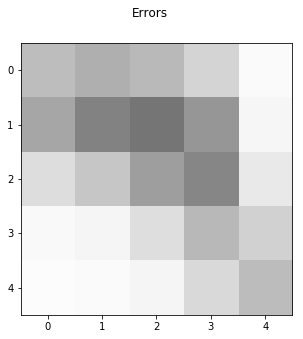

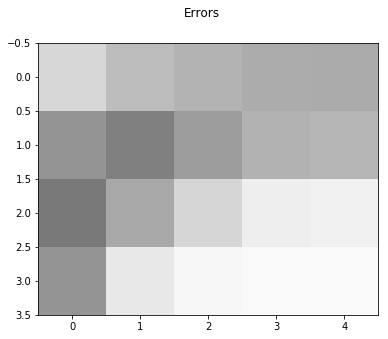

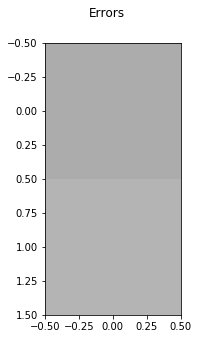

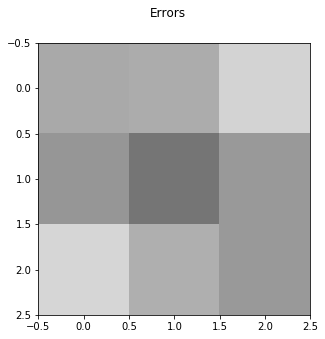

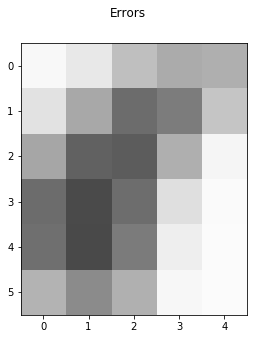

In [114]:
x = parse_img(choosen_xml)
imshow(Image.open(choosen_img))
predictions = best_clf.predict(x)
ones = (predictions == 1).sum()
zeroes = (predictions == 0).sum()

false_predicted = np.array([i for i in range(len(predictions)) if predictions[i] == 0])
im = Image.open(choosen_img)

cropped_ims = []
for index in false_predicted:
    crop_rectangle = tuple(x[index][-4:])
    cropped_ims.append(im.crop(crop_rectangle))

for cropped_im in tqdm.tqdm_notebook(cropped_ims[:10]):
    plt.figure(figsize=(7, 5))
    plt.imshow(cropped_im)
    plt.suptitle("Errors")
    plt.show()

### Вывод:   
В качестве классификатора использовался CatBoostClassifier. Как видно, он в основном редко ошибается. Рассмотрев, где он больше всего ошибается, что то что он принял з текст и вправду похоже на него. А те что принял за картинку в большинстве случаев не похоже на текст.